In [11]:
using LightGraphs
using MetaGraphs
using GraphPlot
using StatsBase
using Distributions
using Random

g = LightGraphs.SimpleGraphs.SimpleGraph(4)
mg = MetaGraphs.MetaGraph(g)
add_edge!(mg,1,2)
add_edge!(mg,1,3)
add_edge!(mg,2,4)
add_edge!(mg,1,2)
mg

{4, 3} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [2]:
for e in edges(mg)
    nw = rand(1:4)
    set_prop!(mg,src(e),dst(e),:weights,rand(nw))
    set_prop!(mg,src(e),dst(e),:types,sample(1:4,nw))
end
for n in 1:nv(mg)
    set_prop!(mg,n,:susceptibility,rand([0.0,1.0]))
end

In [3]:
inf = [1,3,4]
inf_scales = [1.2,0.3,0.7]
ipairs = Array{Int64,2}(undef,3,0)

nbrs = neighbors.(Ref(mg), inf)
#create array of infectious nodes for each contact edge
nin = vcat(fill.(inf,length.(nbrs))...)
#flatten the other array to match
nout = vcat(nbrs...)
#get infectious node infectivity for each edge
j_inf = vcat(fill.(inf_scales,length.(nbrs))...)
#get target node susceptibility for each edge
j_susc = get_prop.(Ref(mg),nout,:susceptibility)

print(nin,'\n',nout,'\n')

#get the edge weights (total transmission rate * contact time, can be multiple per edge)
w = get_prop.(Ref(mg),nin,nout,:weights)
t = get_prop.(Ref(mg),nin,nout,:types)
#fill and flatten all arrays so there is one entry for each entry

nin_all = vcat(fill.(nin,length.(w))...)
nout_all = vcat(fill.(nout,length.(w))...)
j_inf_all = vcat(fill.(j_inf,length.(w))...)
j_susc_all = vcat(fill.(j_susc,length.(w))...)
beta = vcat(w...)
etype = vcat(t...)


print(nin_all,'\n',nout_all,'\n',beta,'\n',etype,'\n',j_inf_all,'\n',j_susc_all,'\n')


#get probability of infection on each edge
eprob = 1 .- exp.(-j_inf_all .* beta .* j_susc_all)

print(eprob,'\n')

#draw which will be infectious (duplicates don't matter)
#print(ecprob,"\n\n")
eind = collect(1:length(eprob))
einf = eind[rand(length(eprob)) .< (eprob)]

print(einf,'\n')

if length(einf) > 0
    ipairs = hcat(ipairs, [nin_all[einf], nout_all[einf], etype[einf]])
end

print(ipairs,'\n')

[1, 1, 3, 4]
[2, 3, 1, 2]
[1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 4, 4, 4, 4]
[2, 2, 2, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2]
[0.1174380315545489, 0.19371764179326845, 0.7502391722503943, 0.08780792990672648, 0.11805492147469732, 0.3896454985225475, 0.9525310713891533, 0.08780792990672648, 0.11805492147469732, 0.3896454985225475, 0.9525310713891533, 0.06331218146823936, 0.3379426423924894, 0.773997576197093, 0.7618761005161492]
[1, 1, 4, 4, 1, 4, 2, 4, 1, 4, 2, 4, 2, 2, 4]
[1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 0.3, 0.3, 0.3, 0.3, 0.7, 0.7, 0.7, 0.7]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Int64[]
Array{Int64}(undef,3,0)


This snippet is out of date

In [1]:
include("network_transmission_workplace.jl")
Params_in = Dict("ND"=>50, "NL"=>30, "NO"=>20, "NDteams"=>5, "NLteams"=>5, "NOteams"=>5,
                 "is_cohorts"=>true, "Pisol"=>0.5, "Psusc"=>1.0, "p_contact"=>(2.0/100),
                 "tD"=>0.05,"phi"=>0.1, "TeamTimes"=>[0.25,1.0,1.0], "TeamsOutside"=>[true,true,false],
                 "TeamDistances"=>[2.0,2.0,2.0], "HouseShareFactor"=>0.5, "CarShareFactor"=>1.0,
                 "SimType"=>Outbreak_sim, "InfInit"=>0)
PParams_in = Dict("is_driver_pairs"=>true, "is_loader_pairs"=>true, "fixed_driver_pairs"=>true,
                  "fixed_loader_pairs"=>true, "is_window_open"=>false)
sim = initialise(Params_in, PParams_in, true, true, zeros(Float64,100), zeros(Float64,100))
draw(PNG("test_cohort_net_wpairs.png",19cm,19cm,dpi=150),
    gplot(sim["cohort_network"], nodefillc=job_colours[sim["job"]]))
draw(PNG("test_hshare_net.png",19cm,19cm,dpi=150),
    gplot(sim["house_share_network"], nodefillc=job_colours[sim["job"]]))
draw(PNG("test_cshare_net.png",19cm,19cm,dpi=150),
    gplot(sim["car_share_network"], nodefillc=job_colours[sim["job"]]))

LoadError: [91mMethodError: no method matching initialise(::Dict{String,Any}, ::Dict{String,Bool}, ::Bool, ::Bool, ::Array{Float64,1}, ::Array{Float64,1})[39m
[91m[0mClosest candidates are:[39m
[91m[0m  initialise(::Dict, ::Dict, [91m::Array{Float64,1}[39m, [91m::Array{Float64,1}[39m) at /Users/carlwhitfield/Documents/Github/Workplace_delivery_transmission/Workplace_delivery_transmission/Network_workplace_model/src/network_transmission_workplace.jl:336[39m

In [12]:
include("network_transmission_workplace.jl")

run_sim_delivery_wp (generic function with 1 method)

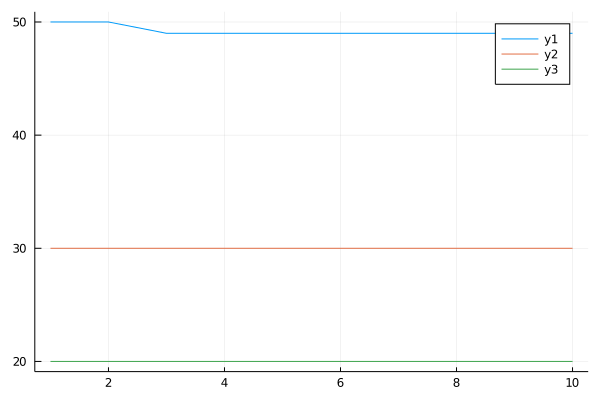

In [44]:
Params_in = Dict("ND"=>50, "NL"=>30, "NO"=>20, "NDteams"=>5, "NLteams"=>5, "NOteams"=>5,
                 "is_cohorts"=>true, "Pisol"=>0.5, "Psusc"=>1.0, "p_contact"=>(2.0/100),
                 "tD"=>0.05,"phi"=>0.1, "TeamTimes"=>[0.25,1.0,1.0], "TeamsOutside"=>[true,true,false],
                 "TeamDistances"=>[2.0,2.0,2.0], "HouseShareFactor"=>0.5, "CarShareFactor"=>1.0,
                 "SimType"=>Outbreak_sim, "InfInit"=>0)
PairParams = Dict("is_driver_pairs"=>true, "is_loader_pairs"=>true,
                  "fixed_driver_pairs"=>true, "fixed_loader_pairs"=>true,
                  "is_window_open"=>false)
Occ = ones(90)
NP = 3000*ones(Int64,90)
out = run_sim_delivery_wp(Params_in, Occ, NP; PairParams=PairParams)
plot(out["time"],out["Susceptible"][1,:])
plot!(out["time"],out["Susceptible"][2,:])
plot!(out["time"],out["Susceptible"][3,:])

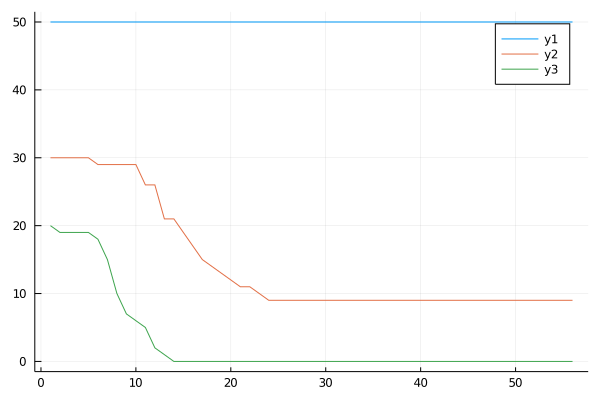

In [45]:
Params_in = Dict("ND"=>50, "NL"=>30, "NO"=>20, "NDteams"=>5, "NLteams"=>5, "NOteams"=>5,
                 "is_cohorts"=>true, "Pisol"=>0.5, "Psusc"=>1.0, "p_contact"=>(2.0/100),
                 "tD"=>0.05,"phi"=>0.1, "TeamTimes"=>[0.25,1.0,1.0], "TeamsOutside"=>[true,true,false],
                 "TeamDistances"=>[2.0,2.0,2.0], "HouseShareFactor"=>0.5, "CarShareFactor"=>1.0,
                 "SimType"=>Outbreak_sim, "InfInit"=>0)
PairParams = Dict("is_driver_pairs"=>true, "is_loader_pairs"=>true,
                  "fixed_driver_pairs"=>false, "fixed_loader_pairs"=>false,
                  "is_window_open"=>false)
Occ = ones(90)
NP = 3000*ones(Int64,90)
out = run_sim_delivery_wp(Params_in, Occ, NP; PairParams=PairParams)
plot(out["time"],out["Susceptible"][1,:])
plot!(out["time"],out["Susceptible"][2,:])
plot!(out["time"],out["Susceptible"][3,:])

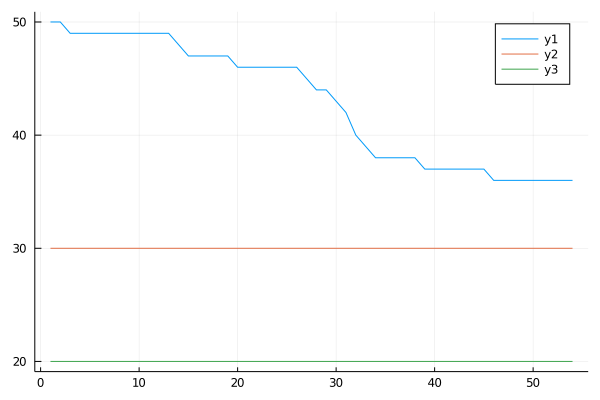

In [18]:
Params_in = Dict("ND"=>50, "NL"=>30, "NO"=>20, "NDteams"=>5, "NLteams"=>5, "NOteams"=>5,
                 "is_cohorts"=>true, "Pisol"=>0.5, "Psusc"=>1.0, "p_contact"=>(2.0/100),
                 "tD"=>0.05,"phi"=>0.1, "TeamTimes"=>[0.25,1.0,1.0], "TeamsOutside"=>[true,true,false],
                 "TeamDistances"=>[2.0,2.0,2.0], "HouseShareFactor"=>0.5, "CarShareFactor"=>1.0,
                 "SimType"=>Outbreak_sim, "InfInit"=>0)
PairParams = Dict("is_driver_pairs"=>true, "is_loader_pairs"=>true,
                  "fixed_driver_pairs"=>false, "fixed_loader_pairs"=>false,
                  "is_window_open"=>false)
PkgParams = Dict("p_fomite_trans"=>0.0001,"PkgHlife"=>1.0,"Ltime"=>2.0,"Dtime"=>8.0)
Occ = ones(90)
NP = 3000*ones(Int64,90)
out = run_sim_delivery_wp(Params_in, Occ, NP; PairParams=PairParams, PkgParams=PkgParams)
plot(out["time"],out["Susceptible"][1,:])
plot!(out["time"],out["Susceptible"][2,:])
plot!(out["time"],out["Susceptible"][3,:])

In [23]:
NPh = 3000
NDh = Int64(round(NPh/80))
NDTh = Int64(round(NDh/12))
NLh = Int64(round(NPh/150))
NLTh = Int64(round(NLh/8))
NOh = Int64(round(NPh/300))
NOTh = Int64(round(NOh/5))
print(NDh, ' ', NLh, ' ', NOh, ' ', NDTh, ' ', NLTh, ' ', NOTh, '\n')

NPh = 300
NDh = Int64(2*round(NPh/30))
NLh = Int64(2*round(NPh/40))
NOh = Int64(round(NPh/40))
print(NDh, ' ', NLh, ' ', NOh)

38 20 10 3 2 2
20 16 8

In [21]:
pph = 1 .+ rand(Multinomial(20, ones(40)./40))
nr_rand = shuffle(1:60)
cumul_pph = cumsum(pph)
for h in 1:40
    if pph[h] > 1
        if h > 1
            iph = (cumul_pph[h-1] + 1):cumul_pph[h]
        else
            iph = 1:cumul_pph[h]
        end
    end
end

hhs = Array{Array{Int64,1},1}(undef,0)
for h in 1:length(pph)
    if(h>1)
        iph = (cumul_pph[h-1] + 1):cumul_pph[h]
    else 
        iph = 1:cumul_pph[h]
    end
    push!(hhs, nr_rand[iph])
end

print(hhs,'\n')

NH = length(pph)
nh = collect(1:NH)
nh_rand = shuffle(nh)
hpc = ones(NH)
cumul_hpc = cumsum(hpc)
cars = Array{Array{Int64,1},1}(undef,0)

nh = collect(1:NH)
Ncars = 30
hpc = 1 .+ rand(Multinomial(NH - Ncars, ones(Ncars) ./ Ncars))
cumul_hpc = cumsum(hpc)
for c in 1:Ncars
    car_share = Array{Int64,1}(undef,0)
    if(c>1)
        ipc = (cumul_hpc[c-1] + 1):cumul_hpc[c]
    else
        ipc = 1:cumul_hpc[c]
    end
    for h in nh_rand[ipc]
        push!.(Ref(car_share), hhs[h])
    end
    push!(cars, car_share)
end
print(cars,'\n')

[[18], [3], [54], [26, 35], [46], [44], [21, 6], [20, 4], [49, 10], [43, 31, 51], [25, 41, 53], [19], [9, 30], [32, 11], [45], [48], [39], [1, 5, 55], [27], [37], [13], [38, 42], [36, 29], [7], [34], [58, 12], [40, 2], [24], [56], [52, 57], [23, 16], [33], [50], [60, 47], [15, 14], [59], [22], [28], [8], [17]]
[[38, 42, 59], [58, 12], [25, 41, 53], [54], [32, 11], [27, 20, 4], [9, 30], [52, 57], [3, 40, 2], [60, 47], [28], [45], [36, 29], [48], [37], [15, 14], [33], [39, 34, 24], [46, 18], [21, 6, 56], [23, 16], [50, 22, 49, 10], [13], [7], [44], [8], [17], [43, 31, 51], [26, 35, 19], [1, 5, 55]]


In [38]:
nbrs = neighbors.(Ref(mg), inf)
x = vcat(fill.(inf, length.(nbrs))...)
vcat(nbrs...)

4-element Array{Int64,1}:
 2
 3
 1
 2

In [29]:
?fill

search: fill fill! finally findall filter filter! filesize filemode filter_edges



```
fill(x, dims::Tuple)
fill(x, dims...)
```

Create an array filled with the value `x`. For example, `fill(1.0, (5,5))` returns a 5×5 array of floats, with each element initialized to `1.0`.

`dims` may be specified as either a tuple or a sequence of arguments. For example, the common idiom `fill(x)` creates a zero-dimensional array containing the single value `x`.

# Examples

```jldoctest
julia> fill(1.0, (2,3))
2×3 Array{Float64,2}:
 1.0  1.0  1.0
 1.0  1.0  1.0

julia> fill(42)
0-dimensional Array{Int64,0}:
42
```

If `x` is an object reference, all elements will refer to the same object:

```jldoctest
julia> A = fill(zeros(2), 2);

julia> A[1][1] = 42; # modifies both A[1][1] and A[2][1]

julia> A
2-element Array{Array{Float64,1},1}:
 [42.0, 0.0]
 [42.0, 0.0]
```

---

```
fill(c)
```

Define a fill color, where `c` can be a `Colorant` or `String`.

---

```
fill(cs::AbstractArray)
```

Arguments can be passed in arrays in order to perform multiple drawing operations at once.


In [24]:
a = Dict()
print(length(a))

0